# WordCloudを作ってる

以下の手順で、WordCloudを作ってみます。

- 前週にも取得した一橋大学のニュース文章を利用
- 単語化などを行った結果を使って登場頻度Top50を使う
- WordCloudを出力する

## 事前準備

前週行ったことと同じように単語化して、Top50の単語を取得します。

In [1]:
# ColabでPathがうまく取れない場合は次のセルを参照
with open("20210502-news-text.txt", "r", encoding="utf-8") as f:
    text = f.read()

In [2]:
# Colabでファイルが取得できない場合
import csv
import urllib.request
import base64
import io
url = "https://hit-u-data-text-processing.herokuapp.com/data/20210502-news-text.txt"
auth_str = base64.b64encode(b"reader:hit-u")
req = urllib.request.Request(url,
                            headers={"Authorization": "Basic " + auth_str.decode("utf-8")})

with urllib.request.urlopen(req) as req:
    text = req.read().decode("utf-8")

In [3]:
#! pip install janome

In [4]:
from janome.tokenizer import Tokenizer
from janome.tokenfilter import TokenFilter
from janome.tokenfilter import CompoundNounFilter
from janome.tokenfilter import POSKeepFilter
from janome.tokenfilter import LowerCaseFilter
from janome.charfilter import UnicodeNormalizeCharFilter
from janome.analyzer import Analyzer

In [5]:
class StopWordFilter(TokenFilter):
    def __init__(self, words):
        self.stop_words = words
    
    def apply(self, tokens):
        for token in tokens:
            if token.surface not in self.stop_words:
                yield token

## StopWordをファイルから取得

stopword.txt ファイルとして保存されている単語をStop Wordとして設定します。

In [6]:
# ColabでPathがうまく取れない場合は次のセルを参照
stop_words = []
with open("stopwords.txt", "r", encoding="utf-8") as f:
    for line in f:
        if line.strip():
            stop_words.append(line.strip())
stop_words

['大学', '一橋大学', '===', 'こと', 'the', 'ため', 'よう', 'of', '(', ')', '様']

In [7]:
# Colabでファイルが取得できない場合
import csv
import urllib.request
import base64
import io
url = "https://hit-u-data-text-processing.herokuapp.com/data/stopwords.txt"
auth_str = base64.b64encode(b"reader:hit-u")
req = urllib.request.Request(url,
                            headers={"Authorization": "Basic " + auth_str.decode("utf-8")})

stop_words = []
with urllib.request.urlopen(req) as req:
    lines = req.read().decode("utf-8")
    for line in lines.split("\n"):
        if line.strip():
            stop_words.append(line.strip())
stop_words

['大学', '一橋大学', '===', 'こと', 'the', 'ため', 'よう', 'of', '(', ')', '様']

In [8]:
stop_word_filter = StopWordFilter(stop_words)

In [9]:
token_filters = [CompoundNounFilter(),
                POSKeepFilter(["名詞"]),
                LowerCaseFilter(),
                stop_word_filter]

In [10]:
char_filters = [UnicodeNormalizeCharFilter()]

In [11]:
tokenizer = Tokenizer()

In [12]:
analyzer = Analyzer(char_filters=char_filters, 
                    tokenizer=tokenizer, 
                    token_filters=token_filters)

In [13]:
noun_words = []
for token in analyzer.analyze(text):
    noun_words.append(token.base_form)

len(noun_words)

1748

In [14]:
from collections import Counter

In [15]:
c = Counter(noun_words)

In [16]:
top50 = c.most_common(50)

In [17]:
top50

[('参加', 12),
 ('世界', 12),
 ('結果', 11),
 ('デザイン組織', 10),
 ('裁判員裁判', 10),
 ('一橋大学大学院法学研究科教授', 10),
 ('本学', 8),
 ('データ', 7),
 ('評価', 7),
 ('の', 7),
 ('もの', 7),
 ('cambridge', 7),
 ('開催', 7),
 ('4年', 7),
 ('デザイン研究センター', 6),
 ('企業', 6),
 ('今回', 6),
 ('活用', 6),
 ('挙行', 6),
 ('こちら', 6),
 ('economic', 6),
 ('history', 6),
 ('modern', 6),
 ('商学部', 6),
 ('課題', 5),
 ('決定係数', 5),
 ('動画', 5),
 ('学生', 5),
 ('2年', 5),
 ('経済学部', 5),
 ('公開講座', 5),
 ('30分', 5),
 ('専門', 5),
 ('日本', 4),
 ('中心', 4),
 ('社内', 4),
 ('他', 4),
 ('開発', 4),
 ('それぞれ', 4),
 ('学部学位記授与式', 4),
 ('開式学位記授与', 4),
 ('大学院学位記授与式', 4),
 ('hitotsubashi', 4),
 ('実施', 4),
 ('対象', 4),
 ('学部', 4),
 ('表彰式', 4),
 ('3年', 4),
 ('表彰', 4),
 ('発行', 4)]

# 画像を作る

- 表示用の準備を行う
- 画像を表示する

In [18]:
import matplotlib.pyplot as plt

In [19]:
from wordcloud import WordCloud

In [20]:
type(top50[0])

tuple

In [21]:
top50_words = []
for word, num in top50:
    top50_words.append(word)
top50_words[:5]

['参加', '世界', '結果', 'デザイン組織', '裁判員裁判']

In [22]:
words_text = ""
for word in noun_words:
    if word in top50_words:
        words_text += word
        words_text += " "

In [23]:
words_text[:100]

'デザイン組織 データ デザイン研究センター 評価 日本 企業 中心 社内 他 評価 課題 課題 企業 デザイン組織 評価 開発 データ デザイン研究センター 開発 データ デザイン研究センター 社内 '

上記のfor文は１行でコード化することも可能です。

In [24]:
words_text = " ".join(word for word in noun_words if word in top50_words)
words_text[:100]

'デザイン組織 データ デザイン研究センター 評価 日本 企業 中心 社内 他 評価 課題 課題 企業 デザイン組織 評価 開発 データ デザイン研究センター 開発 データ デザイン研究センター 社内 '

In [25]:
fpath = "NotoSansJP-Bold.otf"  # NotoSansJPをインストールしている場合

In [26]:
## Google Colabの場合
# !apt-get -y install fonts-ipafont-gothic

In [27]:
# fpath = "/usr/share/fonts/truetype/fonts-japanese-gothic.ttf"  # Google Colabの場合

In [28]:
wordcloud = WordCloud(font_path=fpath,
                      background_color="white", 
                      width=1024, 
                      height=674).generate(words_text)

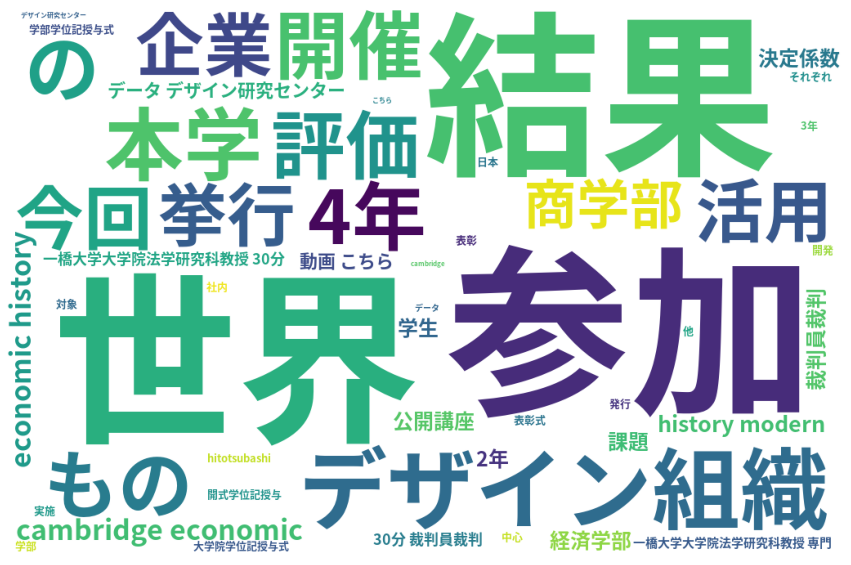

In [29]:
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
# plt.savefig("word_cloud.png")
plt.show()